In [1]:
import torch
import random
from torchvision import datasets, transforms
from torch.utils.data import Subset

# Define your transformation
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0), ratio=(0.8, 1.2)),
    transforms.ToTensor(),
])

# Load full MNIST dataset
full_train_set = datasets.MNIST(
    root="~/datasets",
    train=True,
    download=True,
    transform=transform_train,
)

# Get the targets
targets = full_train_set.targets

# === Get 1000 samples from class 0 ===
class_0_indices = (targets == 0).nonzero(as_tuple=True)[0]
class_0_selected = class_0_indices[:50]

# === Reduce classes 1-9 by 5x ===
reduced_other_classes_indices = []

for cls in range(1, 10):
    cls_indices = (targets == cls).nonzero(as_tuple=True)[0]
    cls_indices = cls_indices.tolist()
    random.shuffle(cls_indices)

    reduced_count = len(cls_indices) // 5  # 5x smaller
    reduced_other_classes_indices.extend(cls_indices[:reduced_count])

# === Combine all selected indices ===
final_indices = torch.tensor(list(class_0_selected.tolist() + reduced_other_classes_indices))

# Create the skewed dataset using Subset
skewed_train_set = Subset(full_train_set, final_indices)

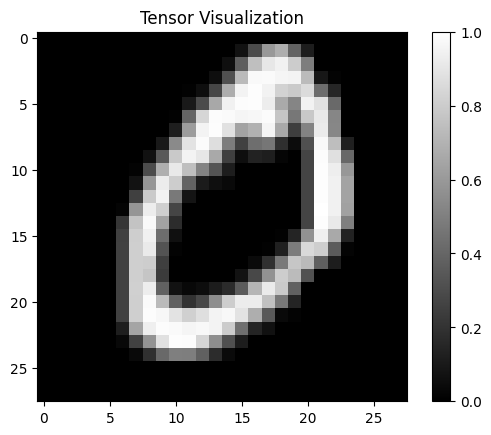

In [3]:
import matplotlib.pyplot as plt

plt.imshow(skewed_train_set[0][0].squeeze(0), cmap='gray')
plt.colorbar()
plt.title("Tensor Visualization")
plt.show()

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import random
import torch

class SynthesizedDataset(Dataset):
    def __init__(self, images, labels=None):
        super(SynthesizedDataset, self).__init__()
        self.images = torch.from_numpy(images).view(-1, 1, 28, 28).to('cpu').float()
        self.labels = torch.tensor(labels).view(-1).to('cpu') if labels is not None else None

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx] if self.labels is not None else None
        return image, label

In [ ]:
import numpy as np

syn_train_set = np.load("../synthetic_train_data.npy")
# syn_train_set = SynthesizedDataset(syn_train_set)

: 

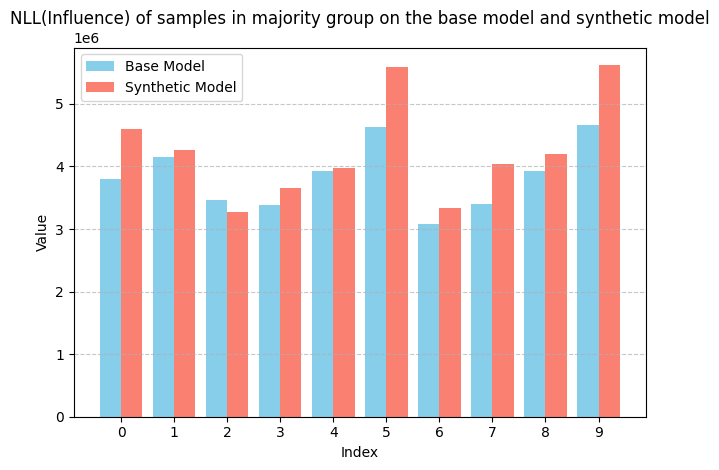

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# X-axis positions
x = np.arange(len(a1))  # [0, 1, 2, ..., 9]
bar_width = 0.4

# Plot
plt.bar(x - bar_width/2, a1, width=bar_width, label='Base Model', color='skyblue')
plt.bar(x + bar_width/2, a3, width=bar_width, label='Synthetic Model', color='salmon')

# Labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('NLL(Influence) of samples in majority group on the base model and synthetic model')
plt.xticks(x)  # Set x-axis ticks to match indices
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()